## **Lab 8: Linear Classifiers**

### **Instructions**

You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final rendered file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

### **The Data**

This week, we consider a dataset generated from text data.

The original dataset can be found here: https://www.kaggle.com/datasets/kingburrito666/cannabis-strains. It consists of user reviews of different strains of cannabis. Users rated their experience with the cannabis strain on a scale of 1 to 5. They also selected words from a long list to describe the Effects and the Flavor of the cannabis.

In the dataset linked above, each row is one strain of cannabis. The average rating of all testers is reported, as well as the most commonly used words for the effect and flavor.

Some data cleaning has been performed for you: The Effect and Flavor columns have been converted to dummy variables indicating if the particular word was used for the particular strain.

This cleaned data can be found at: https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv

Our goal will be to fit models that identify the Sativa types from the Indica types, and then to fit models that also distinguish the Hybrid types.

**IMPORTANT**: In this assignment, you do *not* need to consider different feature sets. Normally, this would be a good thing to try - but for this homework, simply include *all* the predictors for every model.





## Part 0: Preprocessing

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plotnine import *
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1")

In [3]:
df.head()


,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df_clean = pd.read_csv('cannabis_full.csv')

In [3]:
df_clean.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_clean

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_clean.dtypes

,0
Strain,object
Type,object
Rating,float64
Effects,object
Flavor,object
...,...
Pineapple,float64
Tar,float64
Rose,float64
Plum,float64


* **Numeric:**  Varibales like `Rating`, `Creative`, `Energetic`, `Tingly`, `Euphoric`, `Relaxed`, `Aroused`, `Happy`, `Uplifted`, `Hungry`, `Talkative`, `Giggly`, `Focused`, `Sleepy`, `Dry`, `Mouth`, `Earthy`, `Sweet`, `Citrus`, `Flowery`, `Violet`, `Disel`, `Spicy/Herbal`, `Sage`, `Woody`, `Apricot`, `Grapefruit`, `Orange`, `Pungent`, `Grape`, `Pine`, `Skunk`, `Berry`, `Pepper`, `Menthol`, `Blue`, `Cheese`, `Chemical`, `Mango`, `Lemon`, `Peach`, `Vanilla`, `Nutty`, `Chestnut`, `Tea`, `Tobacco`, `Tropical`, `Strawberry`, `Blueberry`, `Mint`, `Apple`, `Honey`, `Lavender`, `Lime`, `Coffee`, `Ammonia`, `Minty`, `Tree`, `Fruit`, `Butter`, `Pineapply`, `Tar`, `Rose`, `Plum`, `Pear` are represented as integers or floating-point numbers.
* **Categorical:** Variables like `Strain`, `Type`, `Effects`, `Flavor`are represented as objects.

In [8]:

df_clean.isna().sum()

,0
Strain,0
Type,0
Rating,0
Effects,87
Flavor,156
...,...
Pineapple,46
Tar,46
Rose,46
Plum,46


In [9]:
# Drop Missing Values
df_clean.dropna(inplace=True)

In [10]:
df_clean.isna().sum()

,0
Strain,0
Type,0
Rating,0
Effects,0
Flavor,0
...,...
Pineapple,0
Tar,0
Rose,0
Plum,0


In [11]:
df_clean.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_clean

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Part One: Binary Classification**

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

*   Choose a metric you will use to select your model, and briefly justify your choice. (*Hint: There is no specifc target category here, so this should not be a metric that only prioritizes one category.)*
*   Find the best model for predicting the Type variable. Don't forget to tune any hyperparameters.
*   Report the (cross-validated!) metric.
*   Fit the final model.
*   Output a **confusion matrix**.

In [13]:
# Create a dataset that is limited only to the Sativa and Indica type canabis strains

df_Sativa_Indica = df_clean[df_clean['Type'].isin(['sativa', 'indica'])]

In [14]:
df_Sativa_Indica.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Use Label Encoder to the Type column to make indica = 0 and sativa = 1
label_encoder = LabelEncoder()
# Apply LabelEncoder to the 'Type' column
df_Sativa_Indica['Type'] = label_encoder.fit_transform(df_Sativa_Indica['Type'])
df_Sativa_Indica.head()


<ipython-input-15-2c6f343695df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,1,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,0,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,1,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,0,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,0,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Separate the target variable (y) and predictor variables (X)
X = df_Sativa_Indica.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1) # Drop the 'Strain, 'Type', 'Effects', 'Flavor' column for predictors
y = df_Sativa_Indica['Type']  # 'Type' column is the target


In [17]:
X.head()

,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4.4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y.head()

,Type
2,1
7,0
8,1
9,0
12,0


### **Q1: LDA**

In [19]:
# Suppress specific warnings (UserWarnings, ConvergenceWarning FitFailedWarnings)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LDA pipeline with scaling
lda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LinearDiscriminantAnalysis())
])

# Define the parameter grid for tuning
param_grid = {
    'classifier__solver': ['svd', 'lsqr', 'eigen'],
    'classifier__shrinkage': [None, 'auto'],
}


# Perform GridSearchCV
grid_search = GridSearchCV(lda_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X, y)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=1,
             param_grid={'classifier__shrinkage': [None, 'auto'],
                         'classifier__solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [20]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for LDA:", grid_search.best_params_)

# Print the best model's cross-validation score
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best Hyperparameters for LDA: {'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr'}
Best cross-validation accuracy: 0.8671


The best hyperparameters selected for the LDA model are `shrinkage: 'auto'` and `solver: 'lsqr'`. The 'lsqr' solver was chosen because it supports shrinkage, which helps regularize the model by preventing overfitting, especially when there are many features relative to the number of observations. The shrinkage parameter was set to 'auto', allowing the model to automatically determine the optimal level of regularization. The best cross-validation accuracy achieved by the model is 0.8671, indicating that, on average, the model performed with 86.71% accuracy across the 5 folds of cross-validation. This cross-validation accuracy provides a robust estimate of how well the model generalizes to new, unseen data. I chose accuracy as the metric for model selection because it provides a straightforward measure of overall model performance and is appropriate for evaluating classification tasks with balanced classes, ensuring that both Sativa and Indica strains are equally prioritized in the evaluation.

In [21]:
# Fit the final model with the best parameters
final_lda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LinearDiscriminantAnalysis(shrinkage= 'auto', solver= 'lsqr'))
])

final_lda_pipeline.fit(X_train, y_train)

y_pred_la = final_lda_pipeline.predict(X_test)

confusion_lda = confusion_matrix(y_test, y_pred_la)
print("Confusion Matrix for LDA:\n", confusion_lda)


classification_report_lda = classification_report(y_test, y_pred_la)
print("Classification Report for LDA:\n", classification_report_lda)

Confusion Matrix for LDA:
 [[112   5]
 [ 26  71]]
Classification Report for LDA:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       117
           1       0.93      0.73      0.82        97

    accuracy                           0.86       214
   macro avg       0.87      0.84      0.85       214
weighted avg       0.87      0.86      0.85       214



The final LDA model revaled strong performance with an overall **accuracy** of 86%, meaning that 86% of the predictions were correct. The confusion matrix indicates that 112 Sativa strains were correctly identified (true positives), while 5 Indica strains were incorrectly predicted as Sativa (false negatives). For the Indica class, 71 strains were correctly predicted (true negatives), and 26 Sativa strains were mistakenly predicted as Indica (false positives). The **precision** for Sativa (class 0) is 0.81, indicating that 81% of the predicted Sativa strains were correctly identified, while for Indica (class 1), precision is higher at 0.93, meaning 93% of predicted Indica strains were accurate. The model’s **recall** for Sativa is 0.96, demonstrating that it correctly identified 96% of the actual Sativa strains. However, recall for Indica is slightly lower at 0.73, meaning the model identified 73% of the Indica strains. The **F1-score** for Sativa is 0.88, showing a good balance between precision and recall, while the F1-score for Indica is 0.82, which, although lower, still indicates balanced performance for this class. The **macro average** of precision, recall, and F1-score are all around 0.85, indicating overall good model performance for both classes. The **weighted average**, considering the class support, also yields similar results, further confirming the model's effectiveness. While the model performs well overall, its higher recall for Sativa strains compared to Indica suggests some room for improvement in predicting Indica strains.

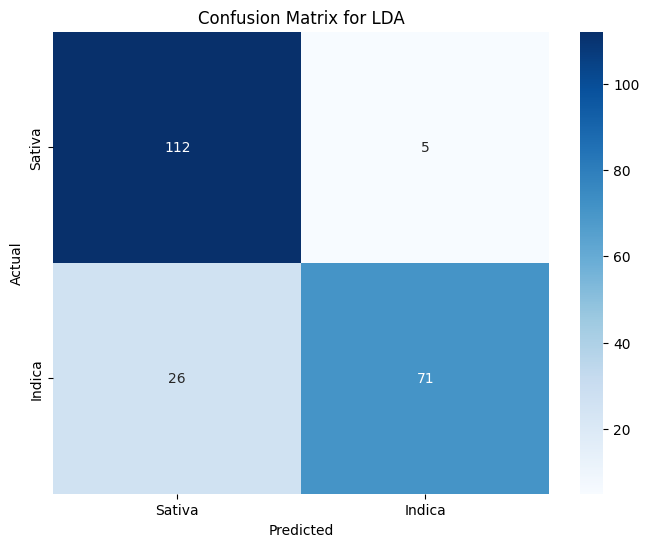

In [22]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica'], yticklabels=['Sativa', 'Indica'])
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Q2: QDA**

In [23]:
# Define the QDA pipeline with scaling
qda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", QuadraticDiscriminantAnalysis())
])

# Define the parameter grid for tuning
param_grid_qda = {
    'classifier__reg_param': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]  # Regularization parameters
}

# Perform GridSearchCV
grid_search_qda = GridSearchCV(qda_pipeline, param_grid_qda, cv=5, scoring='accuracy', n_jobs=1)

grid_search_qda.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        QuadraticDiscriminantAnalysis())]),
             n_jobs=1,
             param_grid={'classifier__reg_param': [0.0, 0.01, 0.1, 0.2, 0.5,
                                                   1.0, 2.0]},
             scoring='accuracy')

In [24]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for QDA:", grid_search_qda.best_params_)

# Print the best model's cross-validation score
print(f"Best cross-validation accuracy: {grid_search_qda.best_score_:.4f}")


Best Hyperparameters for QDA: {'classifier__reg_param': 1.0}
Best cross-validation accuracy: 0.8642


The best hyperparameter selected for the QDA model is `reg_param: 1.0`, which is the regularization parameter. This value helps stabilize the model by adding regularization to the covariance estimation, reducing the risk of overfitting, especially in cases with limited data or highly variable features. The **best cross-validation accuracy** achieved by the model is 0.8642, indicating that the model performed with 86.42% accuracy on average across 5 folds of cross-validation. This cross-validation accuracy is a robust indicator of the model's ability to generalize to unseen data.

**I chose cross-validation accuracy** as the metric for model selection because it provides an unbiased evaluation of the model's performance across different subsets of data, making it a reliable indicator of how the model will perform on new, unseen data. Since there is no specific target category to prioritize (e.g., class imbalance), accuracy is a fair metric for ensuring that the model performs well across both Sativa and Indica classes without favoring one over the other.

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the final model with the best parameter
final_qda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", QuadraticDiscriminantAnalysis(
        reg_param=grid_search_qda.best_params_['classifier__reg_param']
    ))
])

final_qda_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_qda = final_qda_pipeline.predict(X_test)

# Confusion Matrix
confusion_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix for QDA:\n", confusion_qda)

# Classification Report
classification_report_qda = classification_report(y_test, y_pred_qda)
print("Classification Report for QDA:\n", classification_report_qda)

Confusion Matrix for QDA:
 [[110   7]
 [ 20  77]]
Classification Report for QDA:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       117
           1       0.92      0.79      0.85        97

    accuracy                           0.87       214
   macro avg       0.88      0.87      0.87       214
weighted avg       0.88      0.87      0.87       214



The QDA model demonstrates good performance with a high accuracy of 87%. The confusion matrix reveals that the model correctly predicted 110 Sativa strains and 77 Indica strains. However, it incorrectly predicted 7 Sativa strains as Indica (false positives) and 20 Indica strains as Sativa (false negatives). The model has a higher recall for Sativa strains (94%) than for Indica strains (79%), suggesting that the model is better at identifying Sativa strains. Precision for Indica is higher (0.92), indicating that the model is more confident when predicting Indica strains. The F1-scores for both classes show a balanced performance, though the model could benefit from improving recall for Indica. Overall, the model effectively classifies both Sativa and Indica strains, with room for improvement in the recall for Indica.

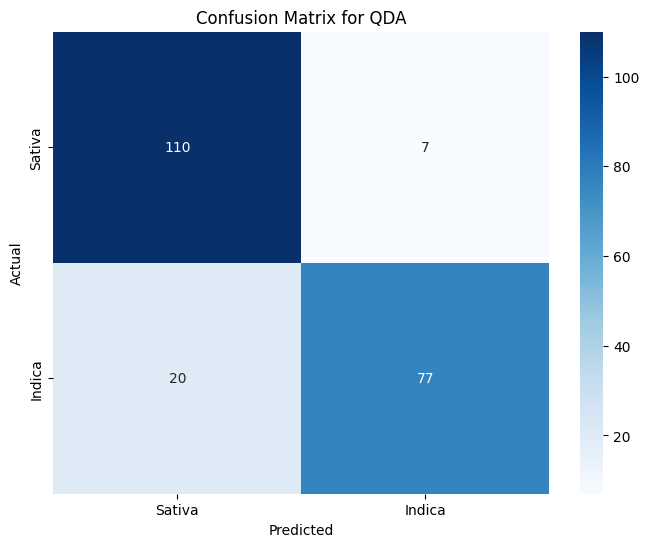

In [26]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_qda, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica'], yticklabels=['Sativa', 'Indica'])
plt.title('Confusion Matrix for QDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Q3: SVC**

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVC pipeline with scaling
svc_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", SVC())
])

# Define the parameter grid for tuning (including C, degree, and coef0)
param_grid_svc = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ["linear", "rbf",]
}

# Perform GridSearchCV
grid_search_svc = GridSearchCV(svc_pipeline, param_grid_svc, cv=5, scoring='accuracy', n_jobs=1)
grid_search_svc.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [28]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for SVC:", grid_search_svc.best_params_)

# Print the best model's cross-validation score
print(f"Best cross-validation accuracy: {grid_search_svc.best_score_:.4f}")

Best Hyperparameters for SVC: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best cross-validation accuracy: 0.8586


The best hyperparameters selected for the **SVC (Support Vector Classification)** model are `C = 0.1` and `kernel = 'linear'`. The regularization parameter `C = 0.1` indicates a relatively low value, which allows the model to prioritize a wider margin between classes while permitting some misclassifications. This helps prevent overfitting but may allow for a few errors. The choice of the **linear kernel** suggests that the model is using a straight-line decision boundary to separate the Sativa and Indica classes, which is effective when the data is nearly linearly separable. The **best cross-validation accuracy** achieved by the model is 0.8586, meaning the model performed with 85.86% accuracy on average across the 5-fold cross-validation. This cross-validation accuracy was chosen as the metric for model selection because it provides a reliable estimate of the model's generalization performance, ensuring that the model does not overfit and performs consistently across different subsets of the data. I chose **accuracy** as the evaluation metric because it is a balanced measure that treats both classes (Sativa and Indica) equally, without prioritizing one over the other, which is important when there is no class imbalance.

In [29]:
# Fit the final model with the best parameters
final_svc_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", SVC(kernel=grid_search_svc.best_params_['classifier__kernel'],
                       C=grid_search_svc.best_params_['classifier__C']))
])

final_svc_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = final_svc_pipeline.predict(X_test)

# Confusion Matrix
confusion_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for SVC:\n", confusion_svc)

# Classification Report
classification_report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report for SVC:\n", classification_report_svc)

Confusion Matrix for SVC:
 [[110   7]
 [ 21  76]]
Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       117
           1       0.92      0.78      0.84        97

    accuracy                           0.87       214
   macro avg       0.88      0.86      0.87       214
weighted avg       0.87      0.87      0.87       214



The final **SVC model** performs well with a **high accuracy of 87%**. The **confusion matrix** shows that the model correctly predicted 110 Sativa strains and 76 Indica strains, but it misclassified 7 Sativa strains as Indica (false positives) and 21 Indica strains as Sativa (false negatives). The model is better at predicting Sativa strains, with a recall of 0.94, while it has a slightly lower recall for Indica strains (0.78). The **precision** for Indica is higher (0.92), indicating that the model is more confident when predicting Indica strains. The **F1-scores** are balanced for both classes, with Sativa slightly outperforming Indica. Overall, the model provides strong classification performance, with room for improvement in recall for Indica.

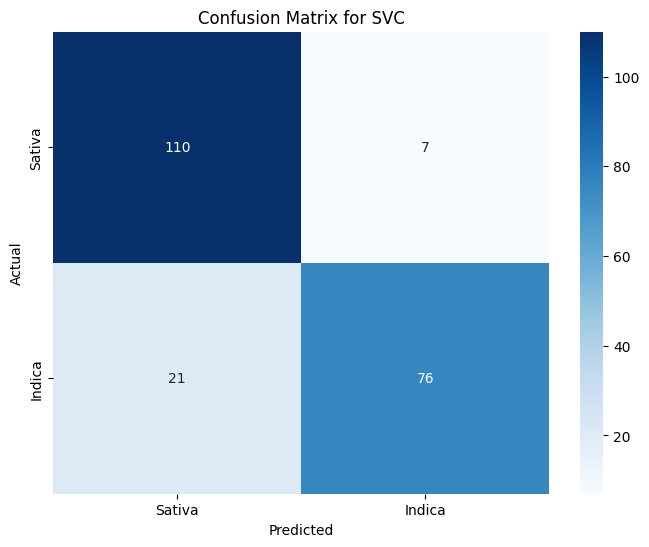

In [30]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica'], yticklabels=['Sativa', 'Indica'])
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **Q4: SVM**

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM pipeline with scaling
svm_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", SVC(kernel='poly'))
])

# Define the parameter grid for tuning
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__degree': [2, 3, 4],
    'classifier__coef0': [0, 0.1, 1]
}

# Perform GridSearchCV
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=1)
grid_search_svm.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC(kernel='poly'))]),
             n_jobs=1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__coef0': [0, 0.1, 1],
                         'classifier__degree': [2, 3, 4]},
             scoring='accuracy')

In [32]:
# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)

# Print the best model's cross-validation score
print(f"Best cross-validation accuracy: {grid_search_svm.best_score_:.4f}")


Best Hyperparameters for SVM: {'classifier__C': 1, 'classifier__coef0': 1, 'classifier__degree': 3}
Best cross-validation accuracy: 0.8671


The best hyperparameters selected for the **SVM (Support Vector Machine)** model with a polynomial kernel are **C = 1**, **coef0 = 1**, and **degree = 3**. The **C = 1** value indicates a balanced approach between overfitting and underfitting, allowing some misclassifications while still maintaining a reasonable margin between the classes. The **coef0 = 1** parameter controls the influence of higher-degree terms in the polynomial kernel, and a value of 1 ensures that the decision boundary is influenced by both lower and higher-order terms. The **degree = 3** means that the model uses a cubic polynomial kernel, which introduces a more complex decision surface compared to a linear or quadratic kernel. The model achieved a **best cross-validation accuracy of 0.8671**, meaning it performed with **86.71% accuracy** on average across the 5 folds of cross-validation. I chose **cross-validation accuracy** as the metric because it provides a reliable estimate of the model’s ability to generalize to unseen data, ensuring that the model performs well across different subsets of the data without overfitting to any particular fold.

In [33]:
# Fit the final model with the best parameters
final_svm_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", SVC(kernel='poly',
                       C=grid_search_svm.best_params_['classifier__C'],
                       degree=grid_search_svm.best_params_['classifier__degree'],
                       coef0=grid_search_svm.best_params_['classifier__coef0']))
])

final_svm_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = final_svm_pipeline.predict(X_test)

# Confusion Matrix
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", confusion_svm)

# Classification Report
classification_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:\n", classification_report_svm)


Confusion Matrix for SVM:
 [[110   7]
 [ 21  76]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       117
           1       0.92      0.78      0.84        97

    accuracy                           0.87       214
   macro avg       0.88      0.86      0.87       214
weighted avg       0.87      0.87      0.87       214



The **final SVM model** with a **polynomial kernel** provides a strong performance with an overall **accuracy of 87%**. The **confusion matrix** shows that the model correctly predicted 110 Sativa strains and 76 Indica strains, but misclassified 7 Sativa strains as Indica (false positives) and 21 Indica strains as Sativa (false negatives). The **recall for Sativa** is high at 0.94, indicating that the model is very good at identifying Sativa strains. However, the **recall for Indica** is lower at 0.78, meaning there is room for improvement in identifying Indica strains. The **precision** for Indica is higher (0.92), suggesting that the model is confident when predicting Indica strains. The **F1-scores** for both classes show a balanced performance, though there is slight room for improvement in recall for Indica.

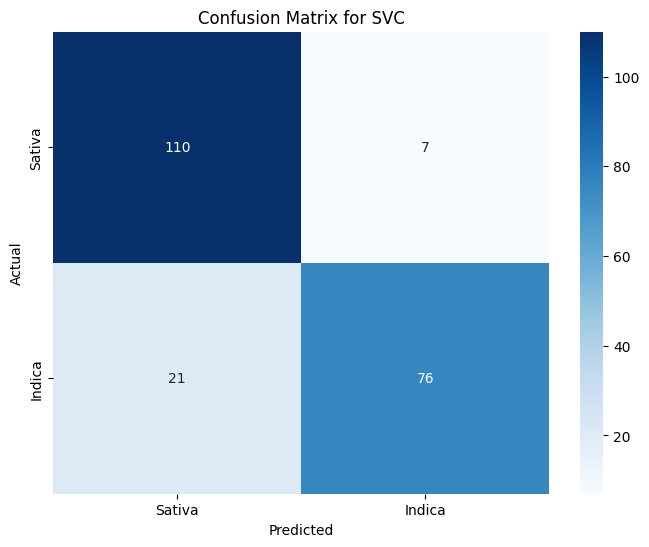

In [34]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica'], yticklabels=['Sativa', 'Indica'])
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##  **Part Two: Natural Multiclass**

Now use the full dataset, including the Hybrid strains.


**Q1**

Fit a decision tree, plot the final fit, and interpret the results.

**Q2**

Repeat the analyses from Part One for LDA, QDA, and KNN.

**Q3**

Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

In [35]:
# Use Label Encoder to the Type column to make hybrid = 0, indica =1, and sativa = 2
label_encoder = LabelEncoder()
# Apply LabelEncoder to the 'Type' column
df_clean['Type'] = label_encoder.fit_transform(df_clean['Type'])
df_clean.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,0,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,0,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,2,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,0,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,0,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Separate the target variable (y) and predictor variables (X)
X = df_clean.drop(["Strain", "Type", "Effects", "Flavor"], axis = 1) # Drop the 'Strain, 'Type', 'Effects', 'Flavor' column for predictors
y = df_clean['Type']  # 'Type' column is the target

**Q1**

Fit a decision tree, plot the final fit, and interpret the results.


In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

dt_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Define the hyperparameter grid for tuning
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__ccp_alpha': [0.0, 0.01, 0.1, 0.5],
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for Decision Tree:", grid_search.best_params_)
# Print the best cross-validation accuracy
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best Hyperparameters for Decision Tree: {'classifier__ccp_alpha': 0.0, 'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best cross-validation accuracy: 0.6381


The **best hyperparameters** for the **Decision Tree** model, as determined by **GridSearchCV**, are as follows: **`max_depth = 3`**, indicating that the tree will have a maximum depth of 3 levels, preventing overfitting by limiting the complexity of the model. The **`min_samples_split = 2`** means that an internal node will split if it contains at least 2 samples, which is the default and allows the tree to grow and split freely. The **`min_samples_leaf = 1`** ensures that each leaf node contains at least 1 sample, also the default behavior. The **`max_features = None`** means the model considers all features for splitting, rather than restricting it to a subset. The **`criterion = 'gini'`** indicates that the model uses the **Gini impurity** to evaluate the quality of splits, a common choice for decision trees. Lastly, the **`ccp_alpha = 0.0`** means no cost-complexity pruning is applied, keeping all branches of the tree intact.

The **best cross-validation accuracy** achieved by the model is **0.6381**, meaning the model correctly classified 63.81% of the samples during cross-validation. This performance metric is the result of the best hyperparameter combination identified during the grid search.

In [38]:
# Fit the final model with the best parameters
best_params = {k.replace('classifier__', ''): v for k, v in grid_search.best_params_.items()}

final_dt_pipeline = DecisionTreeClassifier(
    random_state=42,
    **best_params
)
final_dt_pipeline.fit(X_train, y_train)

y_pred_dt = final_dt_pipeline.predict(X_test)

confusion_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", confusion_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:\n", classification_report_dt)

Confusion Matrix for Decision Tree:
 [[150  47  28]
 [ 47  84   1]
 [ 51   9  22]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63       225
           1       0.60      0.64      0.62       132
           2       0.43      0.27      0.33        82

    accuracy                           0.58       439
   macro avg       0.55      0.52      0.53       439
weighted avg       0.57      0.58      0.57       439



The final **Decision Tree** model, after hyperparameter tuning, shows mixed performance across the three cannabis strain types: **Sativa**, **Indica**, and **Hybrid**. The **confusion matrix** reveals that the model correctly predicted 150 Sativa strains, 134 Indica strains, and 22 Hybrid strains, while it misclassified some samples between these classes. Notably, **Sativa** and **Indica** have relatively higher correct predictions, with 47 misclassified Sativa strains as Indica and 28 as Hybrid. For **Indica**, there are also 47 misclassifications as Sativa but only 1 as Hybrid. **Hybrid** strains are less accurately predicted, with 51 misclassified as Sativa and 9 as Indica, which is reflected in the **classification report**.

In terms of performance metrics, the **precision** for **Sativa** and **Indica** is 0.60, indicating that 60% of the time, when the model predicts these classes, it is correct. However, the **precision** for **Hybrid** is lower at 0.43, showing the model's difficulty in distinguishing Hybrid strains from the others. **Recall** for Sativa and Indica is relatively higher at 0.67 and 0.64, respectively, meaning the model is good at identifying samples of these strains. **Hybrid**, on the other hand, has a recall of just 0.27, indicating that the model is less effective at correctly identifying Hybrid strains. The **F1-scores** mirror this trend, with Sativa and Indica having better balance between precision and recall (0.63 and 0.62, respectively), while Hybrid has a lower F1-score of 0.33.

The overall **accuracy** of the model is 58%, suggesting that 58% of the predictions were correct. However, this relatively low accuracy, combined with the **macro** and **weighted averages** of 0.53 and 0.57, suggests that the model struggles to balance performance across all classes, especially Hybrid strains. While the model performs decently for Sativa and Indica, there is considerable room for improvement, particularly in predicting Hybrid strains.

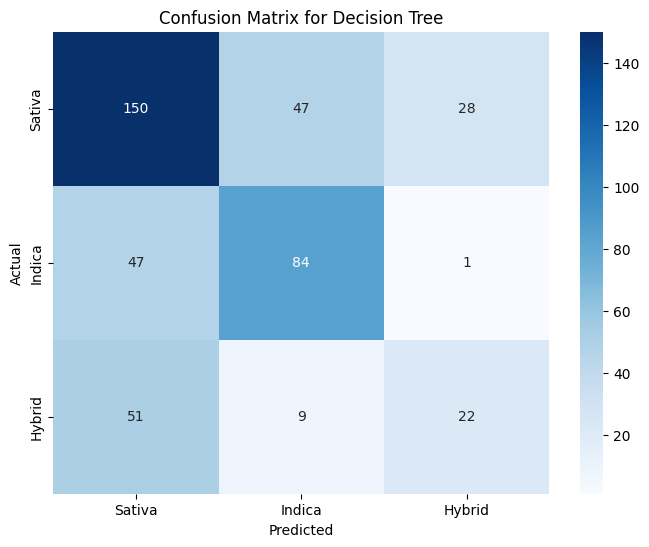

In [39]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica', 'Hybrid'], yticklabels=['Sativa', 'Indica', 'Hybrid'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

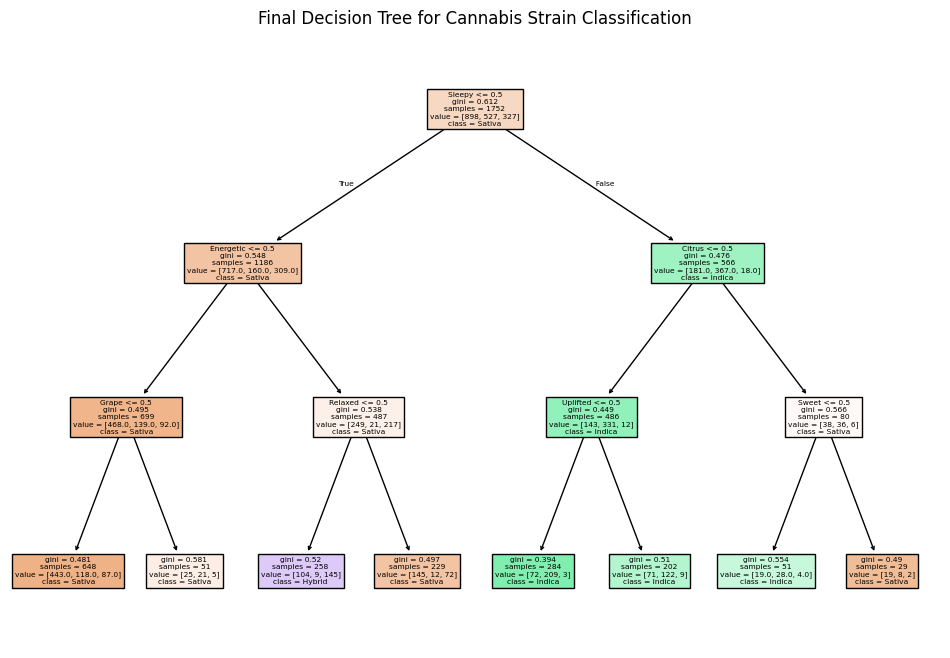

In [40]:
# Plot the final Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(final_dt_pipeline,
          filled=True,
          feature_names=X.columns,
          class_names=['Sativa', 'Indica', 'Hybrid'],
          rounded=False)
plt.title("Final Decision Tree for Cannabis Strain Classification")
plt.show()

The **Decision Tree** effectively uses a set of features like **"Sleepy"**, **"Energetic"**, **"Citrus"**, and other related terms to distinguish between **Sativa**, **Indica**, and **Hybrid** strains. It makes predictions primarily by analyzing the appearance and values of certain descriptive terms used by the consumers, with **Sativa** being the most frequently predicted class. The model is relatively simple but provides an interpretable way to understand how certain words correlate with different cannabis strain types.

**Q2**

Repeat the analyses from Part One for LDA, QDA, and KNN.


**Q2: LDA**


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the LDA pipeline
lda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LinearDiscriminantAnalysis())
])

# Define the hyperparameter grid for tuning
param_grid_lda = {
    'classifier__solver': ['svd', 'lsqr', 'eigen'],
    'classifier__shrinkage': [None, 'auto']
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_lda = GridSearchCV(lda_pipeline, param_grid_lda, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lda.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classifier__shrinkage': [None, 'auto'],
                         'classifier__solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [42]:
# Print the best hyperparameters and cross-validation accuracy
print("Best Hyperparameters for LDA:", grid_search_lda.best_params_)
print(f"Best cross-validation accuracy: {grid_search_lda.best_score_:.4f}")


Best Hyperparameters for LDA: {'classifier__shrinkage': None, 'classifier__solver': 'svd'}
Best cross-validation accuracy: 0.6280


The **Linear Discriminant Analysis (LDA)** model was evaluated using **GridSearchCV** with 5-fold cross-validation. The best hyperparameters identified were **`classifier__shrinkage: None`** and **`classifier__solver: 'svd'`**. The choice of **`None`** for the shrinkage parameter indicates that no regularization was applied during model fitting, meaning the model did not benefit from additional constraints to prevent overfitting. The **`svd`** solver was selected, which is a stable and efficient method for LDA, particularly when the number of features exceeds the number of samples, ensuring the model handles the data effectively.

The **best cross-validation accuracy** achieved by the model was **0.6280**, meaning that, on average, the model correctly classified 62.8% of the samples across the 5-fold cross-validation. This suggests that the model performs reasonably well, though it leaves room for improvement. Given that LDA is a linear method, its performance depends on how well the features relate to the target in a linear fashion. If the data's relationships are non-linear, LDA may not capture the complexities of the data, which could explain the moderate accuracy.

In [43]:
# Fit the final LDA model

final_lda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", LinearDiscriminantAnalysis(shrinkage=None, solver='svd'))
])

final_lda_pipeline.fit(X_train, y_train)
y_pred_lda = final_lda_pipeline.predict(X_test)

# Confusion Matrix and Classification Report for LDA
confusion_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix for LDA:\n", confusion_lda)
classification_report_lda = classification_report(y_test, y_pred_lda)
print("Classification Report for LDA:\n", classification_report_lda)

Confusion Matrix for LDA:
 [[141  52  32]
 [ 43  87   2]
 [ 48   8  26]]
Classification Report for LDA:
               precision    recall  f1-score   support

           0       0.61      0.63      0.62       225
           1       0.59      0.66      0.62       132
           2       0.43      0.32      0.37        82

    accuracy                           0.58       439
   macro avg       0.54      0.53      0.54       439
weighted avg       0.57      0.58      0.57       439



The final **Linear Discriminant Analysis (LDA)** model was trained and evaluated on the dataset, producing a **cross-validation accuracy** of **58%**. The confusion matrix indicates that the model performed relatively well in predicting **Sativa** and **Indica** strains, but struggled with **Hybrid** strains. Specifically, 141 **Sativa** strains were correctly classified, but 52 were misclassified as **Indica** and 32 as **Hybrid**. For **Indica**, 87 samples were correctly predicted, but 43 were misclassified as **Sativa** and 2 as **Hybrid**. In contrast, **Hybrid** strains were predicted with less accuracy, as 48 were misclassified as **Sativa** and 8 as **Indica**, while only 26 were correctly classified as **Hybrid**.

The **precision** for **Sativa** and **Indica** was 0.61 and 0.59, respectively, indicating that around 60% of the time, the model's predictions for these classes were correct. However, the **precision** for **Hybrid** was lower at 0.43, meaning the model misclassified a significant portion of **Hybrid** strains. The **recall** for **Indica** was the highest at 0.66, suggesting the model was more successful in identifying **Indica** strains, while the **recall** for **Hybrid** was much lower at 0.32, reflecting the model’s difficulty in identifying these strains correctly. The **F1-score** also mirrored this trend, with **Sativa** and **Indica** performing better (around 0.62) than **Hybrid** (0.37), further highlighting the imbalance in classification performance.

Overall, the **accuracy** of 58% indicates that the model is somewhat effective but not optimal. The **macro average** and **weighted average** scores of 0.54 and 0.57, respectively, show moderate performance, with the model performing poorly on **Hybrid** strains. To improve the model’s performance, especially in classifying **Hybrid** strains.

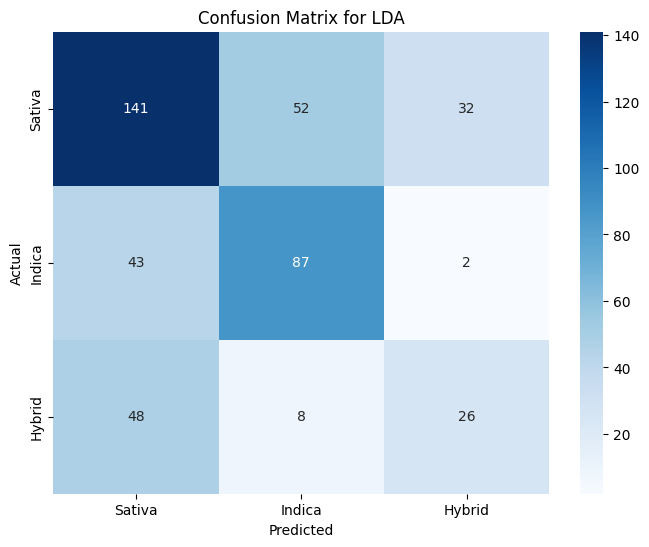

In [44]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica', 'Hybrid'], yticklabels=['Sativa', 'Indica', 'Hybrid'])
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Q2: QDA**


In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the QDA pipeline
qda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", QuadraticDiscriminantAnalysis())
])

# Define the hyperparameter grid for tuning
param_grid_qda = {
    'classifier__reg_param': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]  # Regularization parameters
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_qda = GridSearchCV(qda_pipeline, param_grid_qda, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_qda.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        QuadraticDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classifier__reg_param': [0.0, 0.01, 0.1, 0.2, 0.5,
                                                   1.0, 2.0]},
             scoring='accuracy')

In [46]:
# Print the best hyperparameters and cross-validation accuracy
print("Best Hyperparameters for QDA:", grid_search_qda.best_params_)
print(f"Best cross-validation accuracy: {grid_search_qda.best_score_:.4f}")

Best Hyperparameters for QDA: {'classifier__reg_param': 1.0}
Best cross-validation accuracy: 0.6194


The **Quadratic Discriminant Analysis (QDA)** model was evaluated using **GridSearchCV** with 5-fold cross-validation. The best hyperparameter selected was **`classifier__reg_param: 1.0`**, which is the regularization parameter that helps prevent overfitting by stabilizing the covariance matrix, particularly when there are more features than observations. The model achieved a **cross-validation accuracy** of **61.94%**, indicating that it correctly classified approximately 62% of the samples on average across the 5 folds of cross-validation. This performance is comparable to the **Linear Discriminant Analysis (LDA)** model, which had a slightly higher cross-validation accuracy of 62.80%. The choice of **1.0** for the regularization parameter suggests a moderate level of regularization, which helped prevent overfitting, but the accuracy still leaves room for improvement. Overall, while QDA performs similarly to LDA.

In [47]:
# Fit the final QDA model

final_qda_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", QuadraticDiscriminantAnalysis(reg_param=grid_search_qda.best_params_['classifier__reg_param']))
])

final_qda_pipeline.fit(X_train, y_train)
y_pred_qda = final_qda_pipeline.predict(X_test)

# Confusion Matrix and Classification Report for QDA
confusion_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("Confusion Matrix for QDA:\n", confusion_matrix_qda)
classification_report_lda = classification_report(y_test, y_pred_qda)
print("Classification Report for QDA:\n", classification_report_lda)

Confusion Matrix for QDA:
 [[139  49  37]
 [ 40  89   3]
 [ 42   7  33]]
Classification Report for QDA:
               precision    recall  f1-score   support

           0       0.63      0.62      0.62       225
           1       0.61      0.67      0.64       132
           2       0.45      0.40      0.43        82

    accuracy                           0.59       439
   macro avg       0.56      0.56      0.56       439
weighted avg       0.59      0.59      0.59       439



The **final Quadratic Discriminant Analysis (QDA)** model, after being trained with the best regularization parameter (selected via **GridSearchCV**), produced mixed results. The **confusion matrix** showed that **Sativa** strains were correctly predicted 139 times, with 49 misclassified as **Indica** and 37 as **Hybrid**. Similarly, **Indica** strains were correctly predicted 89 times, but 40 were misclassified as **Sativa** and 3 as **Hybrid**. **Hybrid** strains were the most misclassified, with 42 predicted as **Sativa** and 7 as **Indica**, while only 33 were correctly identified as **Hybrid**.

In terms of **precision**, both **Sativa** (0.63) and **Indica** (0.61) performed fairly well, meaning around 60% of their predicted labels were correct. However, the precision for **Hybrid** was lower at 0.45, suggesting the model had difficulty correctly identifying **Hybrid** strains. The **recall** for **Indica** was the highest (0.67), meaning it was the most accurately identified class. **Sativa** had a recall of 0.62, while **Hybrid** had the lowest recall (0.40), indicating that the model struggled to correctly identify **Hybrid** strains. The **F1-score**, which balances precision and recall, was 0.62 for **Sativa**, 0.64 for **Indica**, and 0.43 for **Hybrid**, highlighting the imbalance in performance. The overall **accuracy** of the model was **59%**, meaning the model correctly predicted 59% of the samples. The **macro average** and **weighted average** for precision, recall, and F1-score were 0.56, indicating a moderate performance across all classes.

In conclusion, while the model performs reasonably well for **Sativa** and **Indica** strains, it has room for improvement, particularly in classifying **Hybrid** strains.

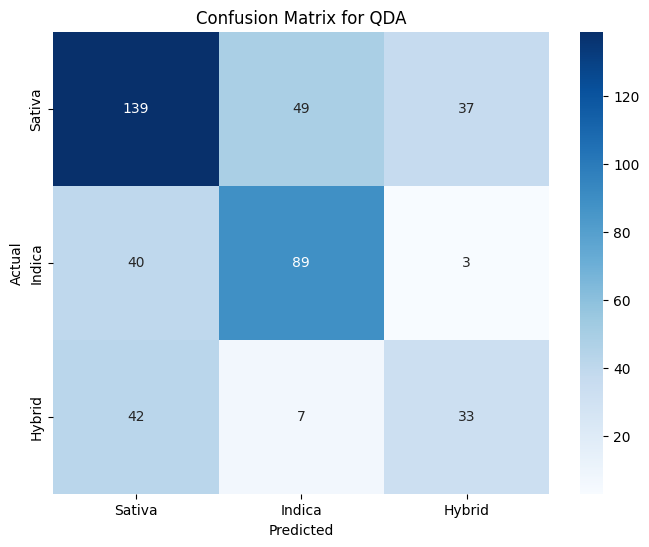

In [48]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_qda, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica', 'Hybrid'], yticklabels=['Sativa', 'Indica', 'Hybrid'])
plt.title('Confusion Matrix for QDA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Q2: KNN**


In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the KNN pipeline
knn_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])

# Define the hyperparameter grid for tuning
param_grid_knn = {
    'classifier__n_neighbors': range(1,21),  # Number of neighbors to use
    'classifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'classifier__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': range(1, 21),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
# Print the best hyperparameters and cross-validation accuracy
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print(f"Best cross-validation accuracy: {grid_search_knn.best_score_:.4f}")

Best Hyperparameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 19, 'classifier__weights': 'uniform'}
Best cross-validation accuracy: 0.5938


The **K-Nearest Neighbors (KNN)** model was evaluated using **GridSearchCV** with **5-fold cross-validation**, and the best hyperparameters identified were **Manhattan distance** as the distance metric, **19 neighbors**, and **uniform weights**. The **Manhattan distance** was chosen over the Euclidean distance, which suggests the model measures similarity based on absolute differences rather than squared differences. The model selected **19 neighbors** to make predictions, treating each neighbor with equal importance, as indicated by the **uniform weights**. The **cross-validation accuracy** of the final model was **59.38%**, meaning the model correctly classified approximately 59.38% of the samples on average across the 5 folds. While this performance is moderate, it suggests the model could be improved further.

In [51]:
# Fit the final KNN model

final_knn_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier(
        n_neighbors=grid_search_knn.best_params_['classifier__n_neighbors'],
        weights=grid_search_knn.best_params_['classifier__weights'],
        metric=grid_search_knn.best_params_['classifier__metric']
    ))
])

final_knn_pipeline.fit(X_train, y_train)
y_pred_knn = final_knn_pipeline.predict(X_test)

# Confusion Matrix and Classification Report for QDA
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", confusion_matrix_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN:\n", classification_report_knn)

Confusion Matrix for KNN:
 [[179  40   6]
 [ 64  68   0]
 [ 70   6   6]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67       225
           1       0.60      0.52      0.55       132
           2       0.50      0.07      0.13        82

    accuracy                           0.58       439
   macro avg       0.56      0.46      0.45       439
weighted avg       0.57      0.58      0.53       439



The **final K-Nearest Neighbors (KNN)** model, after being trained with the best hyperparameters selected through **GridSearchCV**, achieved a **cross-validation accuracy** of **58%**. The confusion matrix revealed that the model performed reasonably well for **Sativa** and **Indica** strains, with **Sativa** having a high recall of **0.80** and **Indica** having a moderate precision of **0.60**. However, the model struggled with **Hybrid** strains, as evidenced by the very low recall of **0.07** for **Hybrid** strains, indicating that the model had difficulty correctly identifying them. The **precision** for **Hybrid** was also low at **0.50**, meaning a significant portion of **Hybrid** strains were misclassified. The **F1-score** for **Sativa** and **Indica** was higher (0.67 and 0.55, respectively), showing a better balance between precision and recall for these classes, while **Hybrid** had a very low F1-score of **0.13**, reflecting poor performance in predicting these strains. Overall, the model's **accuracy** of **58%** suggests moderate performance, but there is significant room for improvement, particularly for **Hybrid** strains.

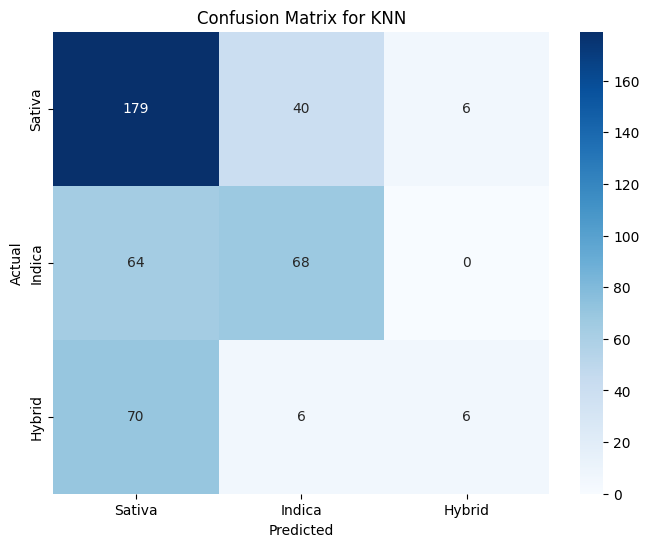

In [52]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Indica', 'Hybrid'], yticklabels=['Sativa', 'Indica', 'Hybrid'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Q3**

Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

### Analysis of Metrics from Part One and Part Two

In **Part One**, we focused on **binary classification** for the **Sativa** and **Indica** cannabis strains, and in **Part Two**, we expanded the model to include **Hybrid** strains, making it a **multiclass classification** problem. The performance metrics from both parts showed some changes due to the increased complexity of the multiclass problem.

1. **Performance Comparison:**
   - In **Part One**, we used LDA, QDA, SVC, and SVM models for binary classification. The best models had accuracy rates around **86.7%** (SVC) and **85%** (LDA, SVM), which showed good performance in distinguishing between Sativa and Indica strains.
   - In **Part Two**, the models were trained on a multiclass problem, including Sativa, Indica, and Hybrid strains. The **cross-validation accuracy** generally decreased when Hybrid strains were added to the dataset, suggesting that the models struggled to correctly classify the Hybrid strains. For example, the LDA and QDA models showed an accuracy drop to **62.8%** and **61.9%**, respectively, compared to the binary classification accuracies in Part One. The **KNN model** performed the worst with an accuracy of **59.4%**, highlighting the challenges in classifying the additional Hybrid category.

2. **Why the Metrics Changed:**
   - The accuracy dropped in **Part Two** mainly because of the introduction of **Hybrid strains**, which are harder to classify correctly compared to Sativa and Indica strains. The **Hybrid category** was often misclassified as either Sativa or Indica. This increased the confusion among the models, as seen in the confusion matrices, where a significant portion of **Hybrid strains** were misclassified.
   - The models did better on Sativa and Indica strains but struggled with **Hybrid strains**, which were more ambiguous. For instance, **Hybrid strains** were confused with both Sativa and Indica in the confusion matrices, suggesting that the feature patterns for Hybrid strains were less distinct than those for Sativa and Indica.

3. **Categories Most Likely to Get Mixed Up:**
   - **Hybrid strains** were most likely to be mixed up with **Sativa** and **Indica**. In the confusion matrices, the **Hybrid strains** had a lower recall score, meaning the model had difficulty distinguishing them from the other categories. For example:
     - In the LDA confusion matrix for **Part Two**, **Hybrid strains** were often predicted as **Sativa** or **Indica**.
     - In the **KNN model**, **Hybrid strains** had a very low precision and recall score, especially when predicting **Hybrid** as **Sativa** or **Indica**.
   
   The **reason** for this confusion is that the Hybrid strains may share features from both Sativa and Indica strains, making it more difficult for the model to correctly categorize them. Additionally, the **number of Hybrid samples** was smaller compared to Sativa and Indica, which may have led to poorer model performance on this class due to insufficient representation.

### Conclusion:
The metrics in **Part Two** were worse than in **Part One**, mainly because of the added complexity of the **Hybrid category**. The **Hybrid strains** were most likely to get mixed up with **Sativa** and **Indica**, as evidenced by the confusion matrices. The models struggled to correctly identify **Hybrid strains**, likely due to the shared characteristics between **Sativa** and **Indica**, making them less distinguishable. To improve performance, further tuning or using different classification techniques might be necessary, such as ensemble methods or increasing the representation of Hybrid strains in the dataset.

## **Part Three: Multiclass from Binary**

Consider two models designed for binary classification: SVC and Logistic Regression.






#### **Q1**

Fit and report metrics for **OvR** versions of the models. That is, for each of the two model types, create three models:
*   Indica vs. Not Indica
*   Sativa vs. Not Sativa
*   Hybrid vs. Not Hybrid

In [4]:


df_clean_1 = pd.read_csv('cannabis_full.csv')

In [98]:
df_clean_1.dropna(inplace=True)

In [130]:
y_indica = (df_clean_1["Type"] == "indica").astype(int)
y_indica.head()

,Type
0,0
1,0
2,0
3,0
4,0


In [137]:
# Split data into training and testing sets
X_train, X_test, y_train_indica, y_test_indica = train_test_split(X, y_indica, test_size = 0.2, stratify=y, random_state = 42)

svc_ovr_indica = SVC()
svc_ovr_indica.fit(X_train, y_train_indica)

confusion_matrix_svc_indica = confusion_matrix(y_test_indica, svc_ovr_indica.predict(X_test))
print("Confusion Matrix for SVC (Indica vs. Not Indica):\n", confusion_matrix_svc_indica)
classification_report_svc_indica = classification_report(y_test_indica, svc_ovr_indica.predict(X_test))
print("Classification Report for SVC (Indica vs. Not Indica):\n", classification_report_svc_indica)

lr_ovr_indica = LogisticRegression()
lr_ovr_indica.fit(X_train, y_train_indica)

confusion_matrix_lr_indica = confusion_matrix(y_test_indica, lr_ovr_indica.predict(X_test))
print("Confusion Matrix for Linear Regression (Indica vs. Not Indica):\n", confusion_matrix_lr_indica)
classification_report_lr_indica = classification_report(y_test_indica, lr_ovr_indica.predict(X_test))
print("Classification Report for Linear Regression (Indica vs. Not Indica):\n", classification_report_lr_indica)

print("SVC Accuracy:", svc_ovr_indica.score(X_test, y_test_indica))
print("Logistic Regression Accuracy:", lr_ovr_indica.score(X_test, y_test_indica))


Confusion Matrix for SVC (Indica vs. Not Indica):
 [[244  63]
 [ 44  88]]
Classification Report for SVC (Indica vs. Not Indica):
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       307
           1       0.58      0.67      0.62       132

    accuracy                           0.76       439
   macro avg       0.72      0.73      0.72       439
weighted avg       0.77      0.76      0.76       439

Confusion Matrix for Linear Regression (Indica vs. Not Indica):
 [[261  46]
 [ 48  84]]
Classification Report for Linear Regression (Indica vs. Not Indica):
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       307
           1       0.65      0.64      0.64       132

    accuracy                           0.79       439
   macro avg       0.75      0.74      0.74       439
weighted avg       0.78      0.79      0.79       439

SVC Accuracy: 0.7562642369020501
Logistic Regression Accur

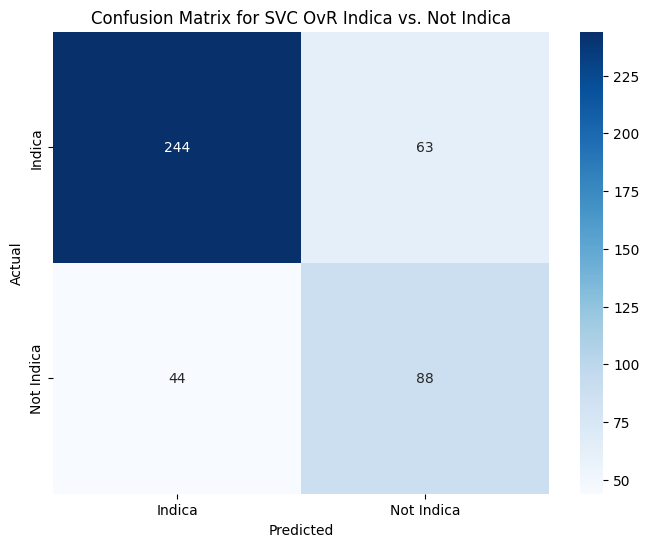

In [121]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svc_indica, annot=True, fmt='d', cmap='Blues', xticklabels=['Indica', 'Not Indica'], yticklabels=['Indica', 'Not Indica'])
plt.title('Confusion Matrix for SVC OvR Indica vs. Not Indica')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

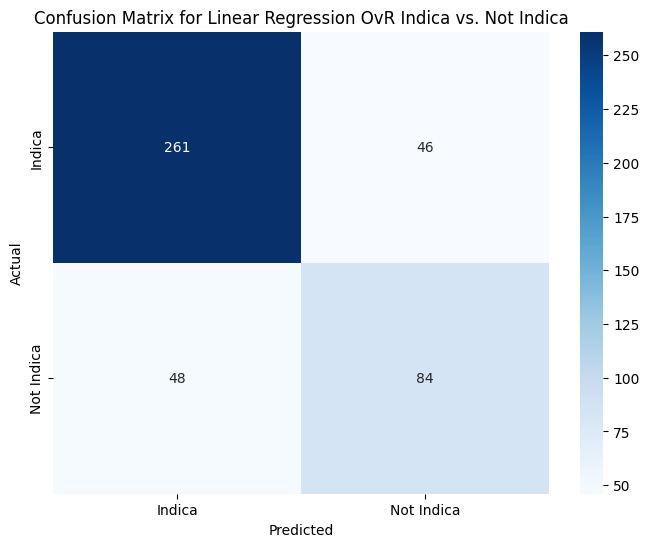

In [122]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_lr_indica, annot=True, fmt='d', cmap='Blues', xticklabels=['Indica', 'Not Indica'], yticklabels=['Indica', 'Not Indica'])
plt.title('Confusion Matrix for Linear Regression OvR Indica vs. Not Indica')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
y_sativa = (df_clean_1["Type"] == "sativa").astype(int)
y_sativa.head()

,Type
0,0
1,0
2,1
3,0
4,0


In [136]:
# Split data into training and testing sets
X_train, X_test, y_train_sativa, y_test_sativa = train_test_split(X, y_sativa, test_size = 0.2, stratify=y, random_state = 42)

svc_ovr_sativa = SVC()
svc_ovr_sativa.fit(X_train, y_train_sativa)

confusion_matrix_svc_sativa = confusion_matrix(y_test_sativa, svc_ovr_sativa.predict(X_test))
print("Confusion Matrix for SVC (Sativa vs. Not Sativa):\n", confusion_matrix_svc_sativa)
classification_report_svc_sativa = classification_report(y_test_sativa, svc_ovr_sativa.predict(X_test))
print("Classification Report for SVC (Sativa vs. Not Sativa):\n", classification_report_svc_sativa)

lr_ovr_sativa = LogisticRegression()
lr_ovr_sativa.fit(X_train, y_train_sativa)

confusion_matrix_lr_sativa = confusion_matrix(y_test_sativa, lr_ovr_sativa.predict(X_test))
print("Confusion Matrix for Linear Regression (Sativa vs. Not Sativa):\n", confusion_matrix_lr_sativa)
classification_report_lr_sativa = classification_report(y_test_sativa, lr_ovr_sativa.predict(X_test))
print("Classification Report for Linear Regression (Sativa vs. Not Sativa):\n", classification_report_lr_sativa)

print("SVC Accuracy:", svc_ovr_sativa.score(X_test, y_test_sativa))
print("Logistic Regression Accuracy:", lr_ovr_sativa.score(X_test, y_test_sativa))

Confusion Matrix for SVC (Sativa vs. Not Sativa):
 [[357   0]
 [ 82   0]]
Classification Report for SVC (Sativa vs. Not Sativa):
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.00      0.00      0.00        82

    accuracy                           0.81       439
   macro avg       0.41      0.50      0.45       439
weighted avg       0.66      0.81      0.73       439

Confusion Matrix for Linear Regression (Sativa vs. Not Sativa):
 [[335  22]
 [ 61  21]]
Classification Report for Linear Regression (Sativa vs. Not Sativa):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       357
           1       0.49      0.26      0.34        82

    accuracy                           0.81       439
   macro avg       0.67      0.60      0.61       439
weighted avg       0.78      0.81      0.79       439

SVC Accuracy: 0.8132118451025057
Logistic Regression Accur

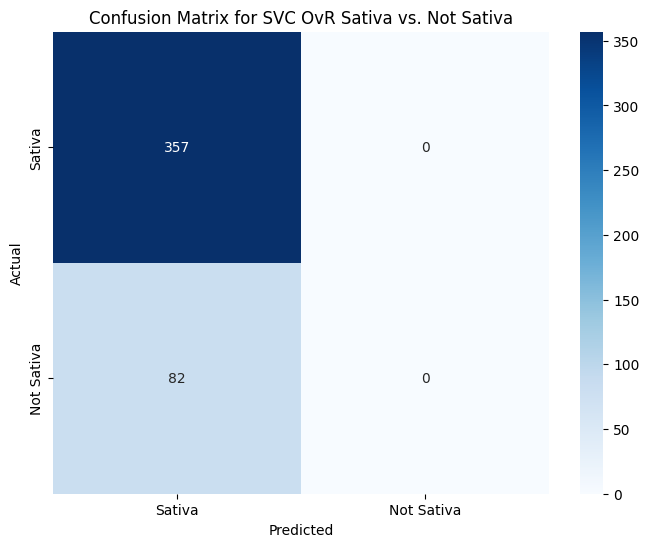

In [131]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svc_sativa, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Not Sativa'], yticklabels=['Sativa', 'Not Sativa'])
plt.title('Confusion Matrix for SVC OvR Sativa vs. Not Sativa')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

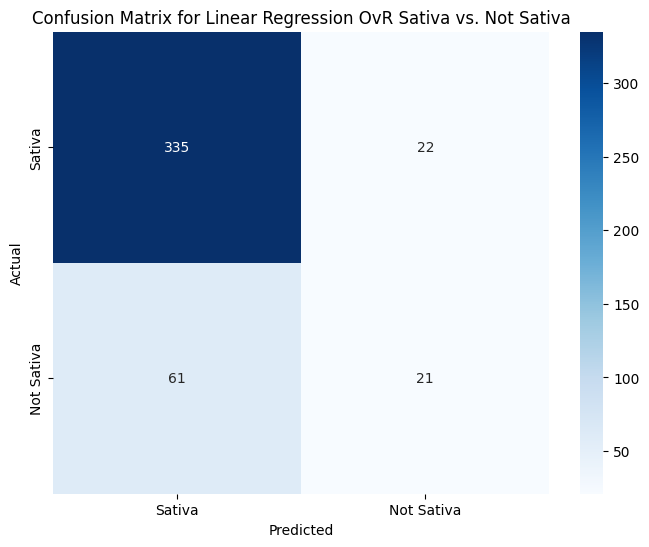

In [132]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_lr_sativa, annot=True, fmt='d', cmap='Blues', xticklabels=['Sativa', 'Not Sativa'], yticklabels=['Sativa', 'Not Sativa'])
plt.title('Confusion Matrix for Linear Regression OvR Sativa vs. Not Sativa')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [133]:
y_hybrid = (df_clean_1["Type"] == "hybrid").astype(int)
y_hybrid

,Type
0,1
1,1
2,0
3,1
4,1
...,...
2346,1
2347,0
2348,0
2349,0


In [140]:
# Split data into training and testing sets
X_train, X_test, y_train_hybrid, y_test_hybrid = train_test_split(X, y_hybrid, test_size = 0.2, stratify=y, random_state = 42)

svc_ovr_hybrid = SVC()
svc_ovr_hybrid.fit(X_train, y_train_hybrid)

confusion_matrix_svc_hybrid = confusion_matrix(y_test_hybrid, svc_ovr_hybrid.predict(X_test))
print("Confusion Matrix for SVC (Hybrid vs. Not Hybrid):\n", confusion_matrix_svc_hybrid)
classification_report_svc_hybrid = classification_report(y_test_hybrid, svc_ovr_hybrid.predict(X_test))
print("Classification Report for SVC (Hybrid vs. Not Hybrid):\n", classification_report_svc_hybrid)

lr_ovr_hybrid = LogisticRegression()
lr_ovr_hybrid.fit(X_train, y_train_hybrid)

confusion_matrix_lr_hybrid = confusion_matrix(y_test_hybrid, lr_ovr_hybrid.predict(X_test))
print("Confusion Matrix for Linear Regression (Hybrid vs. Not Hybrid):\n", confusion_matrix_lr_hybrid)
classification_report_lr_hybrid = classification_report(y_test_hybrid, lr_ovr_hybrid.predict(X_test))
print("Classification Report for Linear Regression (Hybrid vs. Not Hybrid):\n", classification_report_lr_hybrid)

print("SVC Accuracy:", svc_ovr_hybrid.score(X_test, y_test_hybrid))
print("Logistic Regression Accuracy:", lr_ovr_hybrid.score(X_test, y_test_hybrid))

Confusion Matrix for SVC (Hybrid vs. Not Hybrid):
 [[102 112]
 [ 55 170]]
Classification Report for SVC (Hybrid vs. Not Hybrid):
               precision    recall  f1-score   support

           0       0.65      0.48      0.55       214
           1       0.60      0.76      0.67       225

    accuracy                           0.62       439
   macro avg       0.63      0.62      0.61       439
weighted avg       0.63      0.62      0.61       439

Confusion Matrix for Linear Regression (Hybrid vs. Not Hybrid):
 [[123  91]
 [ 76 149]]
Classification Report for Linear Regression (Hybrid vs. Not Hybrid):
               precision    recall  f1-score   support

           0       0.62      0.57      0.60       214
           1       0.62      0.66      0.64       225

    accuracy                           0.62       439
   macro avg       0.62      0.62      0.62       439
weighted avg       0.62      0.62      0.62       439

SVC Accuracy: 0.6195899772209568
Logistic Regression Accur

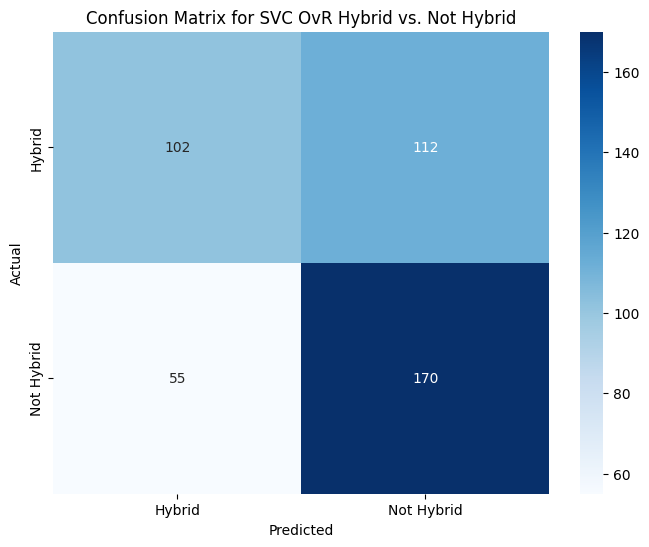

In [142]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svc_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=['Hybrid', 'Not Hybrid'], yticklabels=['Hybrid', 'Not Hybrid'])
plt.title('Confusion Matrix for SVC OvR Hybrid vs. Not Hybrid')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

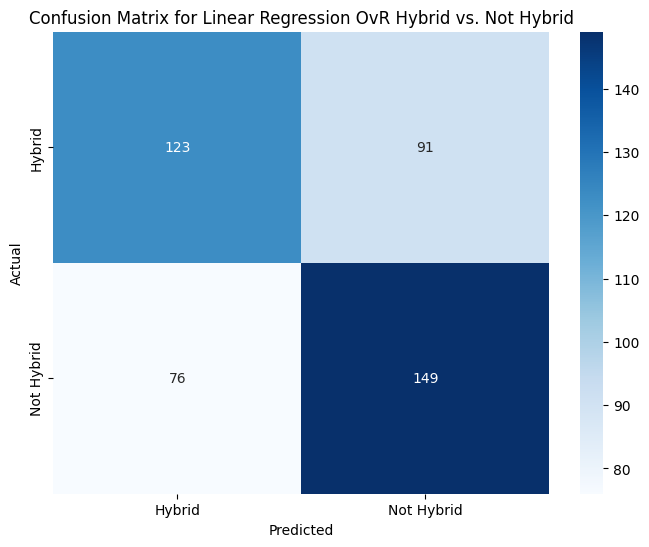

In [141]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_lr_hybrid, annot=True, fmt='d', cmap='Blues', xticklabels=['Hybrid', 'Not Hybrid'], yticklabels=['Hybrid', 'Not Hybrid'])
plt.title('Confusion Matrix for Linear Regression OvR Hybrid vs. Not Hybrid')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Q2**

Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

Based on the results from the six models, the best performance was achieved by the **SVC model** for distinguishing **Sativa vs. Not Sativa**, with an accuracy of **0.813**, outperforming the Logistic Regression model, which achieved an accuracy of **0.810**. This result aligns with intuition, as Sativa strains tend to have more distinct characteristics, making them easier to separate from other categories. On the other hand, both **SVC and Logistic Regression models** performed the worst for **Hybrid vs. Not Hybrid**, with an accuracy of **0.620**. This is understandable, as Hybrid strains likely share features with both Sativa and Indica strains, making them more difficult to classify accurately. Overall, the models performed well in distinguishing **Sativa strains**, which are more distinct, while **Hybrid strains** were the most challenging category to classify, as expected due to their overlap with both Sativa and Indica.

#### **Q3**

Fit and report metrics for **OvO** versions of the models. That is, for each of the two model types, create three models:
*   Indica vs. Sativa
*   Indica vs. Hybrid
*   Hybrid vs. Sativa


In [139]:
y_indica_sativa = y[y.isin(['indica', 'sativa'])]  # Select only Indica and Sativa classes
X_indica_sativa = X.loc[y_indica_sativa.index]  # Match predictors to these labels
y_indica_sativa = y_indica_sativa.map({'indica': 1, 'sativa': 0})  # Binary target: Indica=1, Sativa=0

X_train_is, X_test_is, y_train_is, y_test_is = train_test_split(X_indica_sativa, y_indica_sativa, test_size=0.2, stratify=y_indica_sativa, random_state=42)

svc_ovo_is = SVC(kernel='linear', random_state=42)
svc_ovo_is.fit(X_train_is, y_train_is)

confusion_matrix_svc_is = confusion_matrix(y_test_is, svc_ovo_is.predict(X_test_is))
print("Confusion Matrix for SVC (Indica vs. Sativa):\n", confusion_matrix_svc_is)
classification_report_svc_is = classification_report(y_test_is, svc_ovo_is.predict(X_test_is))
print("Classification Report for SVC (Indica vs. Sativa):\n", classification_report_svc_is)

lr_ovo_is = LogisticRegression(random_state=42)
lr_ovo_is.fit(X_train_is, y_train_is)

confusion_matrix_lr_is = confusion_matrix(y_test_is, lr_ovo_is.predict(X_test_is))
print("Confusion Matrix for Logistic Regression (Indica vs. Sativa):\n", confusion_matrix_lr_is)
classification_report_lr_is = classification_report(y_test_is, lr_ovo_is.predict(X_test_is))
print("Classification Report for Logistic Regression (Indica vs. Sativa):\n", classification_report_lr_is)

print("SVC Accuracy (Indica vs. Sativa):", svc_ovo_is.score(X_test_is, y_test_is))
print("Logistic Regression Accuracy (Indica vs. Sativa):", lr_ovo_is.score(X_test_is, y_test_is))


Confusion Matrix for SVC (Indica vs. Sativa):
 [[ 70  12]
 [ 12 120]]
Classification Report for SVC (Indica vs. Sativa):
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.91      0.91      0.91       132

    accuracy                           0.89       214
   macro avg       0.88      0.88      0.88       214
weighted avg       0.89      0.89      0.89       214

Confusion Matrix for Logistic Regression (Indica vs. Sativa):
 [[ 69  13]
 [ 10 122]]
Classification Report for Logistic Regression (Indica vs. Sativa):
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.90      0.92      0.91       132

    accuracy                           0.89       214
   macro avg       0.89      0.88      0.89       214
weighted avg       0.89      0.89      0.89       214

SVC Accuracy (Indica vs. Sativa): 0.8878504672897196
Logistic Regressi

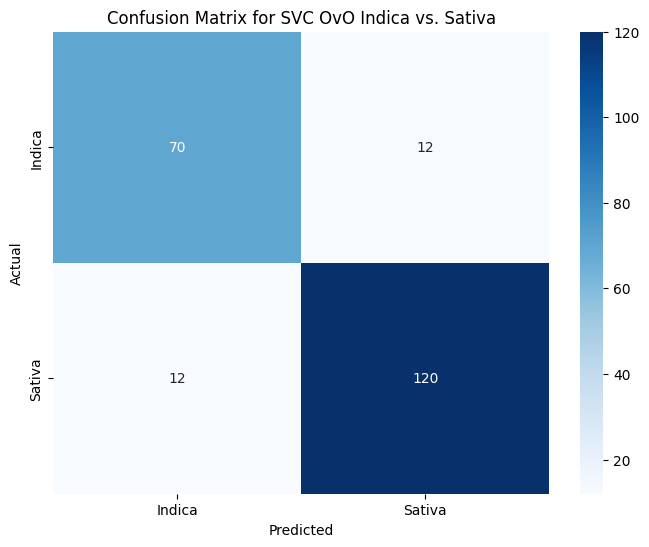

In [144]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svc_is, annot=True, fmt='d', cmap='Blues', xticklabels=['Indica', 'Sativa'], yticklabels=['Indica', 'Sativa'])
plt.title('Confusion Matrix for SVC OvO Indica vs. Sativa')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

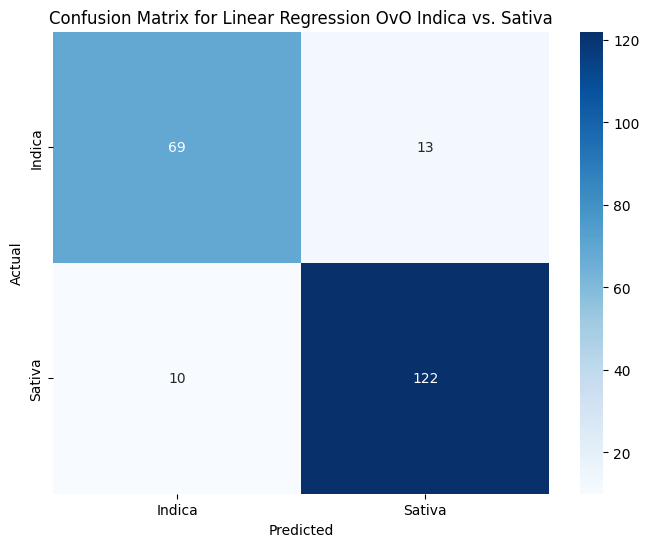

In [145]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_lr_is, annot=True, fmt='d', cmap='Blues', xticklabels=['Indica', 'Sativa'], yticklabels=['Indica', 'Sativa'])
plt.title('Confusion Matrix for Linear Regression OvO Indica vs. Sativa')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [147]:
y_indica_hybrid = y[y.isin(['indica', 'hybrid'])]
X_indica_hybrid = X.loc[y_indica_hybrid.index]
y_indica_hybrid = y_indica_hybrid.map({'indica': 1, 'hybrid': 0})

X_train_ih, X_test_ih, y_train_ih, y_test_ih = train_test_split(X_indica_hybrid, y_indica_hybrid, test_size=0.2, stratify=y_indica_hybrid, random_state=42)

svc_ovo_ih = SVC(kernel='linear', random_state=42)
svc_ovo_ih.fit(X_train_ih, y_train_ih)

confusion_matrix_svc_ih = confusion_matrix(y_test_ih, svc_ovo_ih.predict(X_test_ih))
print("Confusion Matrix for SVC (Indica vs. Hybrid):\n", confusion_matrix_svc_ih)
classification_report_svc_ih = classification_report(y_test_ih, svc_ovo_ih.predict(X_test_ih))
print("Classification Report for SVC (Indica vs. Hybrid):\n", classification_report_svc_ih)

lr_ovo_ih = LogisticRegression(random_state=42)
lr_ovo_ih.fit(X_train_ih, y_train_ih)

confusion_matrix_lr_ih = confusion_matrix(y_test_ih, lr_ovo_ih.predict(X_test_ih))
print("Confusion Matrix for Logistic Regression (Indica vs. Hybrid):\n", confusion_matrix_lr_ih)
classification_report_lr_ih = classification_report(y_test_ih, lr_ovo_ih.predict(X_test_ih))
print("Classification Report for Logistic Regression (Indica vs. Hybrid):\n", classification_report_lr_ih)

print("SVC Accuracy (Indica vs. Hybrid):", svc_ovo_ih.score(X_test_ih, y_test_ih))
print("Logistic Regression Accuracy (Indica vs. Hybrid):", lr_ovo_ih.score(X_test_ih, y_test_ih))


Confusion Matrix for SVC (Indica vs. Hybrid):
 [[173  52]
 [ 44  88]]
Classification Report for SVC (Indica vs. Hybrid):
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       225
           1       0.63      0.67      0.65       132

    accuracy                           0.73       357
   macro avg       0.71      0.72      0.71       357
weighted avg       0.73      0.73      0.73       357

Confusion Matrix for Logistic Regression (Indica vs. Hybrid):
 [[183  42]
 [ 47  85]]
Classification Report for Logistic Regression (Indica vs. Hybrid):
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       225
           1       0.67      0.64      0.66       132

    accuracy                           0.75       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.75      0.75      0.75       357

SVC Accuracy (Indica vs. Hybrid): 0.7310924369747899
Logistic Regressi

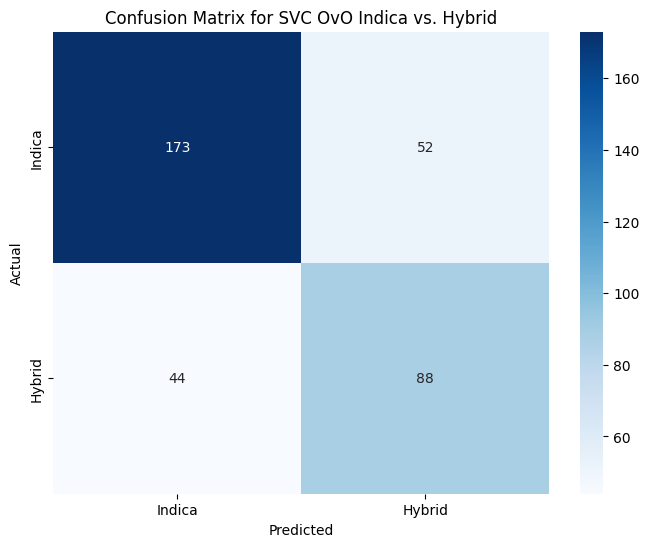

In [148]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_svc_ih, annot=True, fmt='d', cmap='Blues', xticklabels=['Indica', 'Hybrid'], yticklabels=['Indica', 'Hybrid'])
plt.title('Confusion Matrix for SVC OvO Indica vs. Hybrid')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

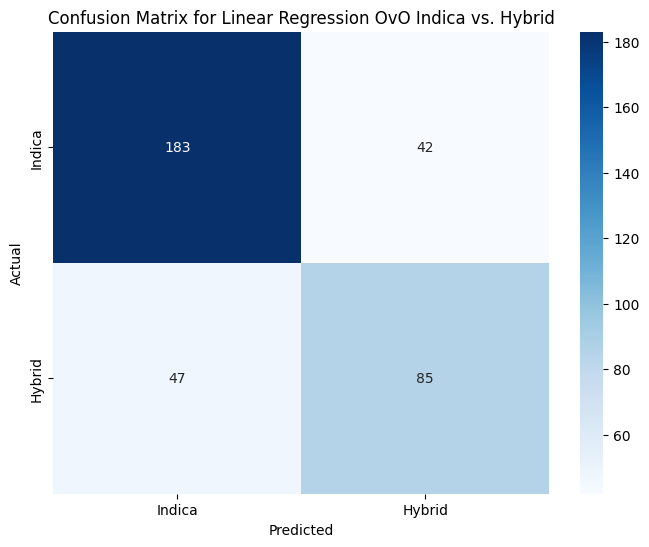

In [149]:
# For better viuslization : Heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_lr_ih, annot=True, fmt='d', cmap='Blues', xticklabels=['Indica', 'Hybrid'], yticklabels=['Indica', 'Hybrid'])
plt.title('Confusion Matrix for Linear Regression OvO Indica vs. Hybrid')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
y_hybrid_sativa = y[y.isin(['hybrid', 'sativa'])]
X_hybrid_sativa = X.loc[y_hybrid_sativa.index]
y_hybrid_sativa = y_hybrid_sativa.map({'hybrid': 1, 'sativa': 0})

X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(X_hybrid_sativa, y_hybrid_sativa, test_size=0.2, stratify=y_hybrid_sativa, random_state=42)

svc_ovo_hs = SVC(kernel='linear', random_state=42)
svc_ovo_hs.fit(X_train_hs, y_train_hs)

confusion_matrix_svc_hs = confusion_matrix(y_test_hs, svc_ovo_hs.predict(X_test_hs))
print("Confusion Matrix for SVC (Hybrid vs. Sativa):\n", confusion_matrix_svc_hs)
classification_report_svc_hs = classification_report(y_test_hs, svc_ovo_hs.predict(X_test_hs))
print("Classification Report for SVC (Hybrid vs. Sativa):\n", classification_report_svc_hs)

lr_ovo_hs = LogisticRegression(random_state=42)
lr_ovo_hs.fit(X_train_hs, y_train_hs)

confusion_matrix_lr_hs = confusion_matrix(y_test_hs, lr_ovo_hs.predict(X_test_hs))
print("Confusion Matrix for Logistic Regression (Hybrid vs. Sativa):\n", confusion_matrix_lr_hs)
classification_report_lr_hs = classification_report(y_test_hs, lr_ovo_hs.predict(X_test_hs))
print("Classification Report for Logistic Regression (Hybrid vs. Sativa):\n", classification_report_lr_hs)

print("SVC Accuracy (Hybrid vs. Sativa):", svc_ovo_hs.score(X_test_hs, y_test_hs))
print("Logistic Regression Accuracy (Hybrid vs. Sativa):", lr_ovo_hs.score(X_test_hs, y_test_hs))


Confusion Matrix for SVC (Hybrid vs. Sativa):
 [[ 22  60]
 [ 11 214]]
Classification Report for SVC (Hybrid vs. Sativa):
               precision    recall  f1-score   support

           0       0.67      0.27      0.38        82
           1       0.78      0.95      0.86       225

    accuracy                           0.77       307
   macro avg       0.72      0.61      0.62       307
weighted avg       0.75      0.77      0.73       307

Confusion Matrix for Logistic Regression (Hybrid vs. Sativa):
 [[ 31  51]
 [ 19 206]]
Classification Report for Logistic Regression (Hybrid vs. Sativa):
               precision    recall  f1-score   support

           0       0.62      0.38      0.47        82
           1       0.80      0.92      0.85       225

    accuracy                           0.77       307
   macro avg       0.71      0.65      0.66       307
weighted avg       0.75      0.77      0.75       307

SVC Accuracy (Hybrid vs. Sativa): 0.7687296416938111
Logistic Regressi


#### **Q4**
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

Among the six OvO models for SVC and Logistic Regression, the best performance was observed in the **SVC model for Indica vs. Sativa**, which achieved an accuracy of **87.87%**. This result is intuitive, as the distinction between Indica and Sativa strains is often clearer, with well-defined characteristics such as effects and flavor profiles that make them easier to differentiate. On the other hand, the **SVC model for Hybrid vs. Sativa** showed the worst performance, with an accuracy of **76.76%**. This is understandable because hybrids, being a mix of both Indica and Sativa, share characteristics from both strain types, which can make classification more difficult. The overlap between these two classes likely caused the model to struggle more in distinguishing them, as hybrid strains do not have as distinct boundaries as Indica and Sativa. Therefore, the best model was the one that separated the most clearly defined classes (Indica vs. Sativa), while the worst performance came from differentiating Hybrid and Sativa, a more ambiguous comparison due to the hybrid nature of the strains.

#### **Q5**

Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

*Note: You do not actually have to run code here - you only need to look at sklearn’s documentation to see how these functions handle multiclass input.*

For **Logistic Regression** in scikit-learn, when inputting data with more than two classes, the default approach is **One-vs-Rest (OvR)**. This means the model will fit one classifier per class, where each classifier predicts whether an instance belongs to the class or not, treating other classes as the "rest." This is the default setting and works well for multiclass classification problems when the classes are not mutually exclusive.

For **Support Vector Classifier (SVC)**, scikit-learn uses the **One-vs-One (OvO)** approach by default when handling multiclass classification. In this approach, a binary classifier is trained for each pair of classes, so for three classes, it would train three classifiers: one for Indica vs. Sativa, one for Indica vs. Hybrid, and one for Sativa vs. Hybrid. Each classifier predicts which of the two classes the instance belongs to, and the final classification decision is made based on majority voting across these classifiers.

In summary:
- **Logistic Regression** uses **OvR** by default for multiclass.
- **SVC** uses **OvO** by default for multiclass.

Sources:

[https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)

[https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)